Importing the libraries

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import joblib


DATA PREPROCESSING 

In [2]:
df_train = pd.read_csv("thermoracleTrain.csv")

In [3]:
df_train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [4]:
df_train.columns

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels',
       'Atmospheric Composition Index', 'Prediction'],
      dtype='object')

In [5]:
df_train.isnull().sum()

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64

In [6]:
#droppping the nan rows with respect to prediction column
df_train = df_train.dropna(subset=['Prediction'],axis=0)

In [7]:
df_train.info()
#max rows -> 56961

<class 'pandas.core.frame.DataFrame'>
Index: 56961 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            54119 non-null  float64
 1   Surface Temperature            54065 non-null  float64
 2   Gravity                        54135 non-null  float64
 3   Water Content                  54025 non-null  float64
 4   Mineral Abundance              54177 non-null  float64
 5   Orbital Period                 54106 non-null  float64
 6   Proximity to Star              54175 non-null  float64
 7   Magnetic Field Strength        54020 non-null  object 
 8   Radiation Levels               54102 non-null  object 
 9   Atmospheric Composition Index  54166 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.2+ MB


In [8]:
df_train.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,54119.000000,54065.000000,54135.000000,54025.000000,54177.000000,54106.000000,54175.000000,54166.000000,56961.000000
mean,0.000782,-0.000189,0.001420,0.002989,-0.000493,-0.002460,0.000175,0.000905,4.454381
std,2.264576,1.935645,1.803014,1.689254,1.606125,1.512004,1.317638,1.118741,2.890055
min,-4.364843,-5.426189,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.557017,-1.425784,-1.276589,-1.216900,-1.078339,-1.050927,-0.937742,-0.708407,2.000000
50%,-0.188784,-0.329290,0.045905,-0.003819,0.040993,0.036056,-0.061354,0.050243,4.000000
75%,1.310067,1.502515,1.255387,1.063485,1.095244,1.058141,0.886808,0.789252,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


VISUALIZING THE DATA

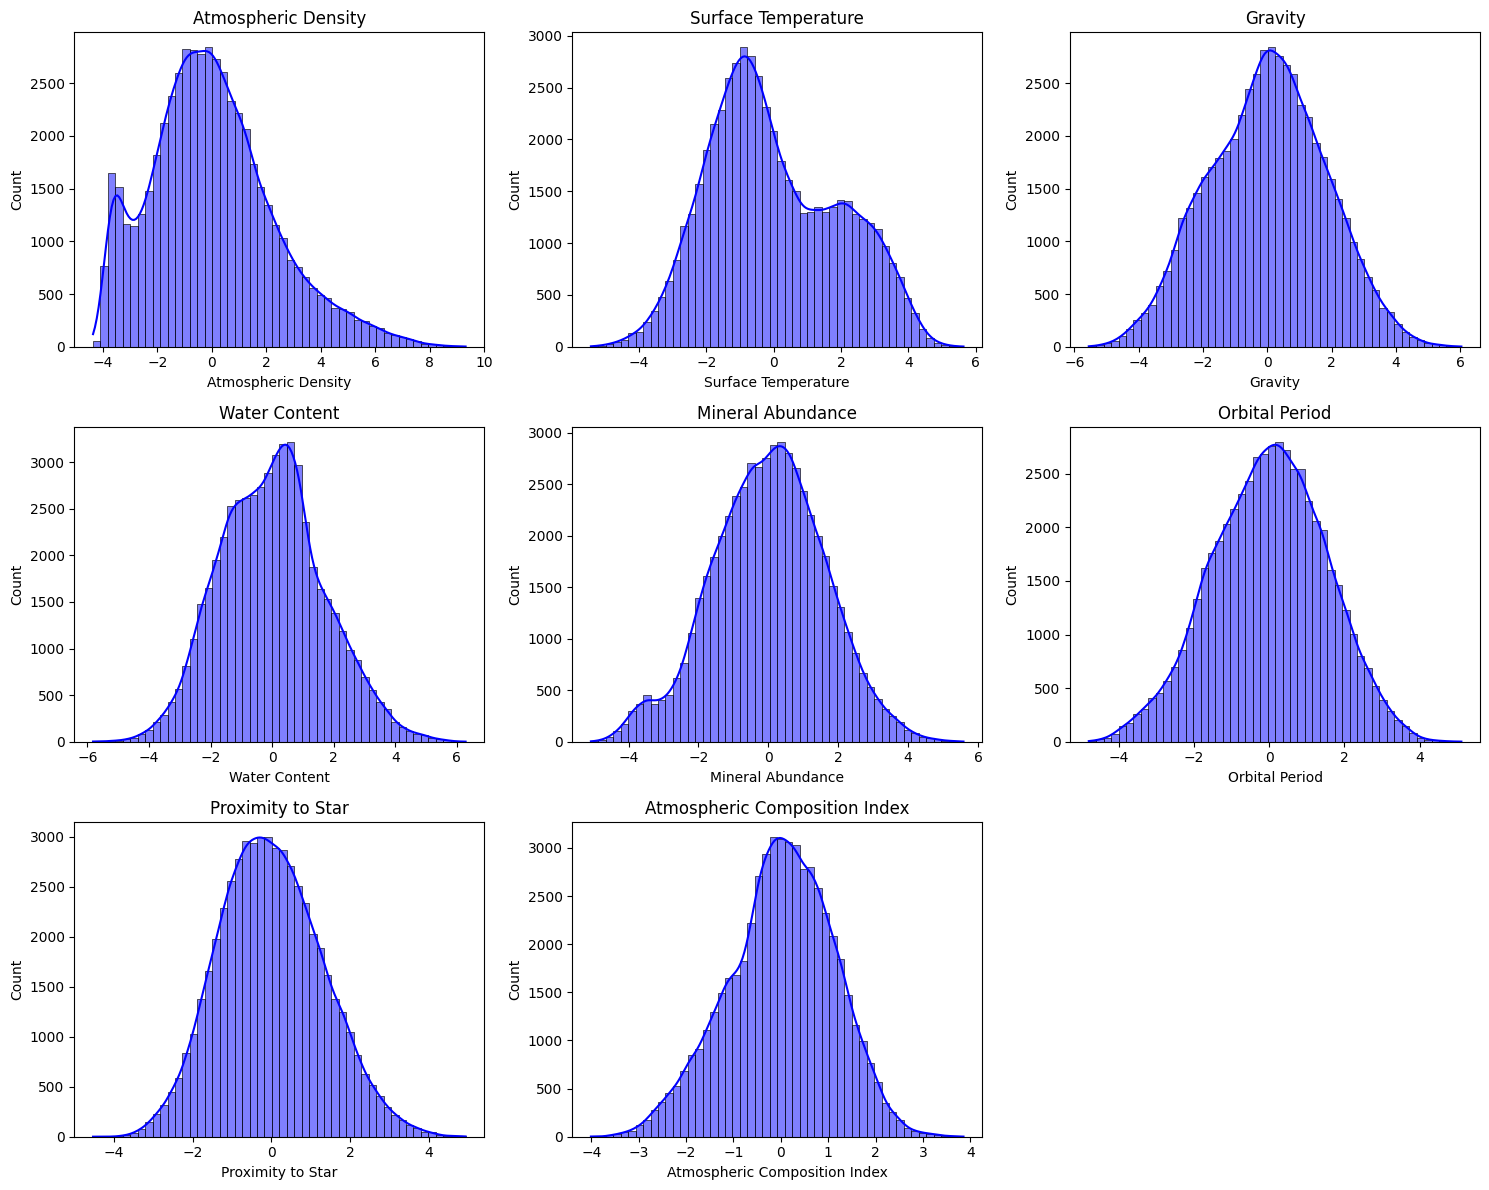

In [9]:
numerical_columns = [x for x in df_train.columns[:-1] if df_train[x].dtype == 'float64']

plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_train[feature].dropna(), kde=True, bins=50, color='blue')
    plt.title(feature)
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

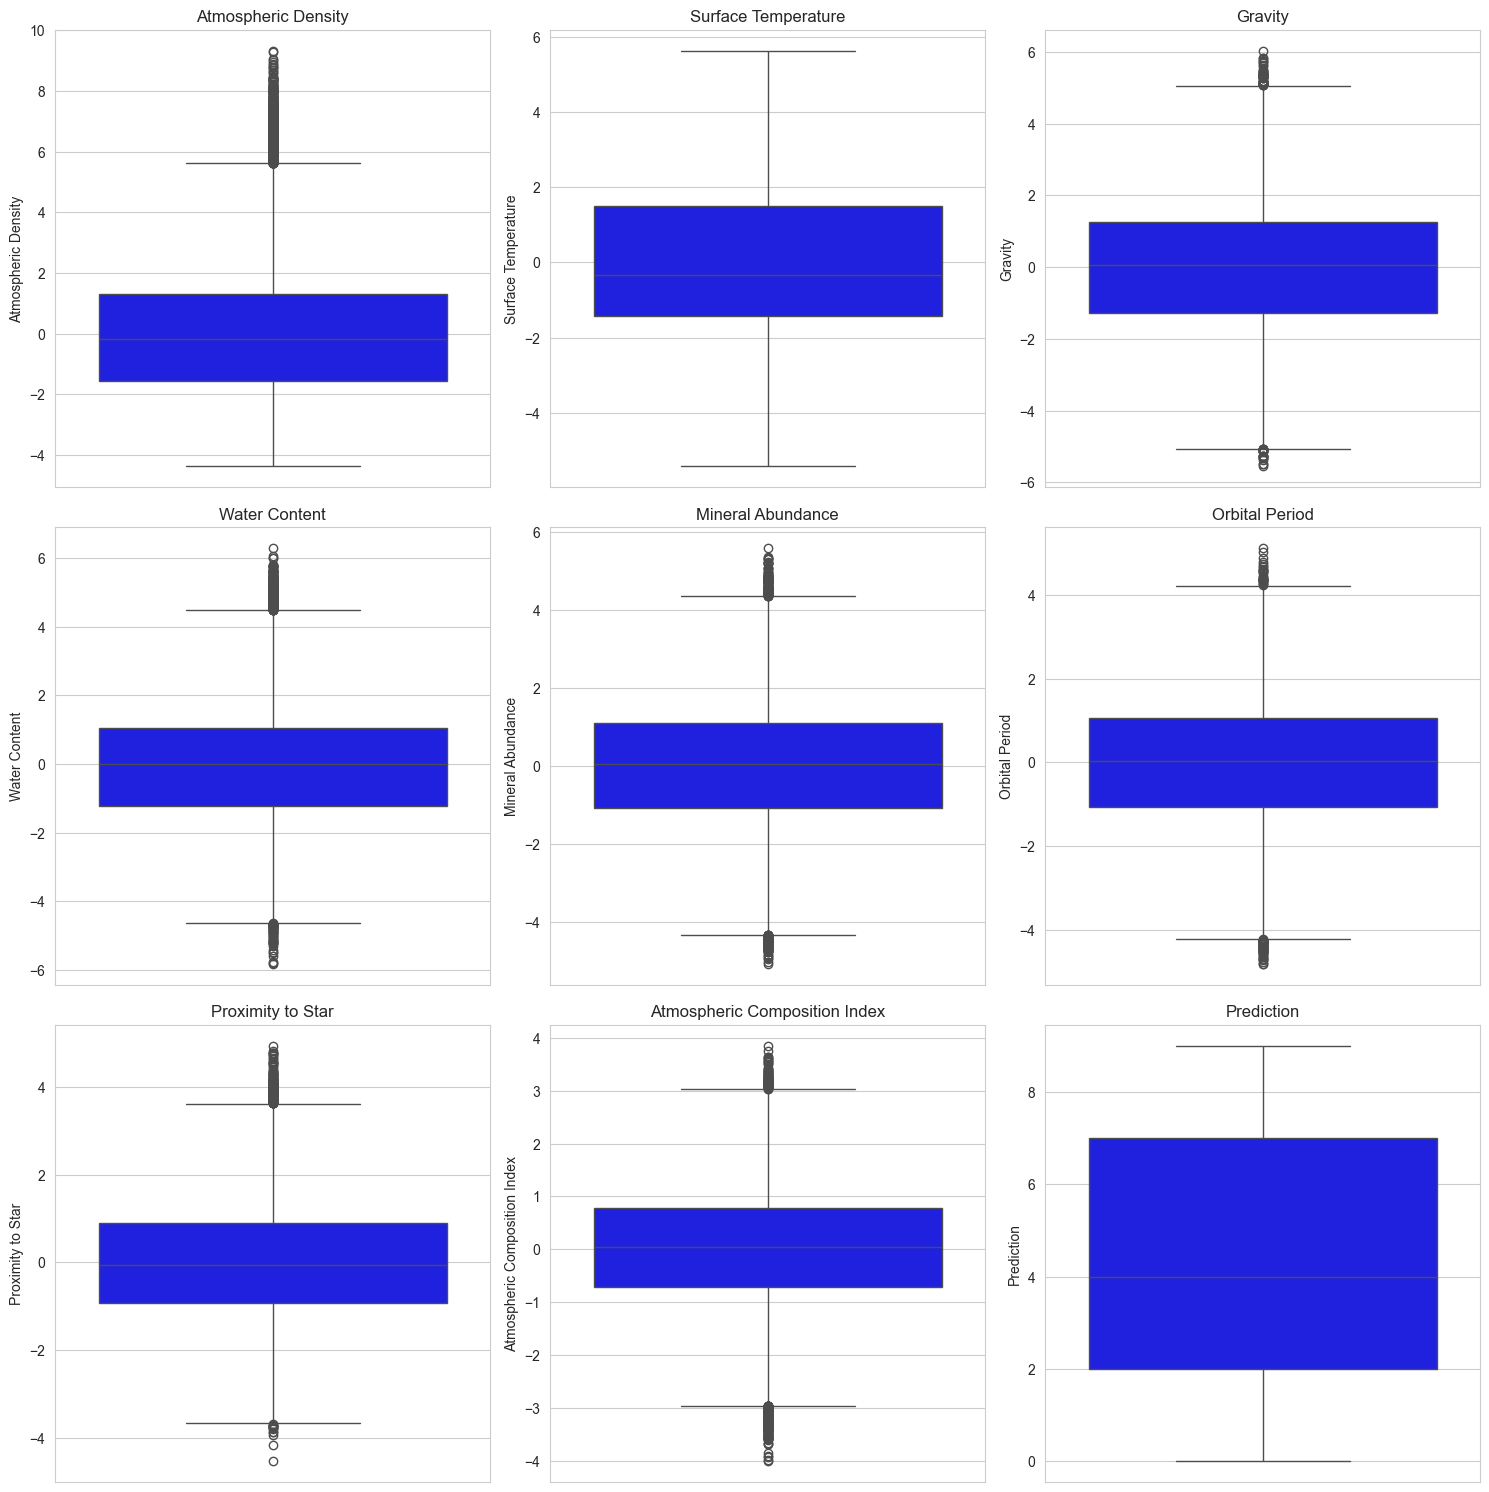

In [10]:
plt.figure(figsize=(15, 10))

sns.set_style("whitegrid")
df_numeric = df_train.select_dtypes(include=["float64", "int64"])

fig, axes = plt.subplots(nrows=len(df_numeric.columns)//3 + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i], color="blue")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


here are the observations from both these data
1. in case of atmospheric data -> there are some outliers(very large positive values) but some negative values in kde which are very unexpected (filtering them)
2. in case of gravity removing the outliers
3. same in case of water content 
4. in case of mineral abundance there is some spikes with very large negative values
5. so overall removing the outliers from each feature(columns)

In [11]:
def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    """
    Removes outliers from the DataFrame using the IQR method.
    It only applies to columns with dtype 'float64' and retains all other columns.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    
    Returns:
    pd.DataFrame: Cleaned DataFrame with outliers removed.
    """
    numeric_cols = df.select_dtypes(include=['float64']).columns[:-1]
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    mask = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    
    return df[mask].reset_index(drop=True)

df_cleaned = remove_outliers_iqr(df_train)


<Figure size 1500x1000 with 0 Axes>

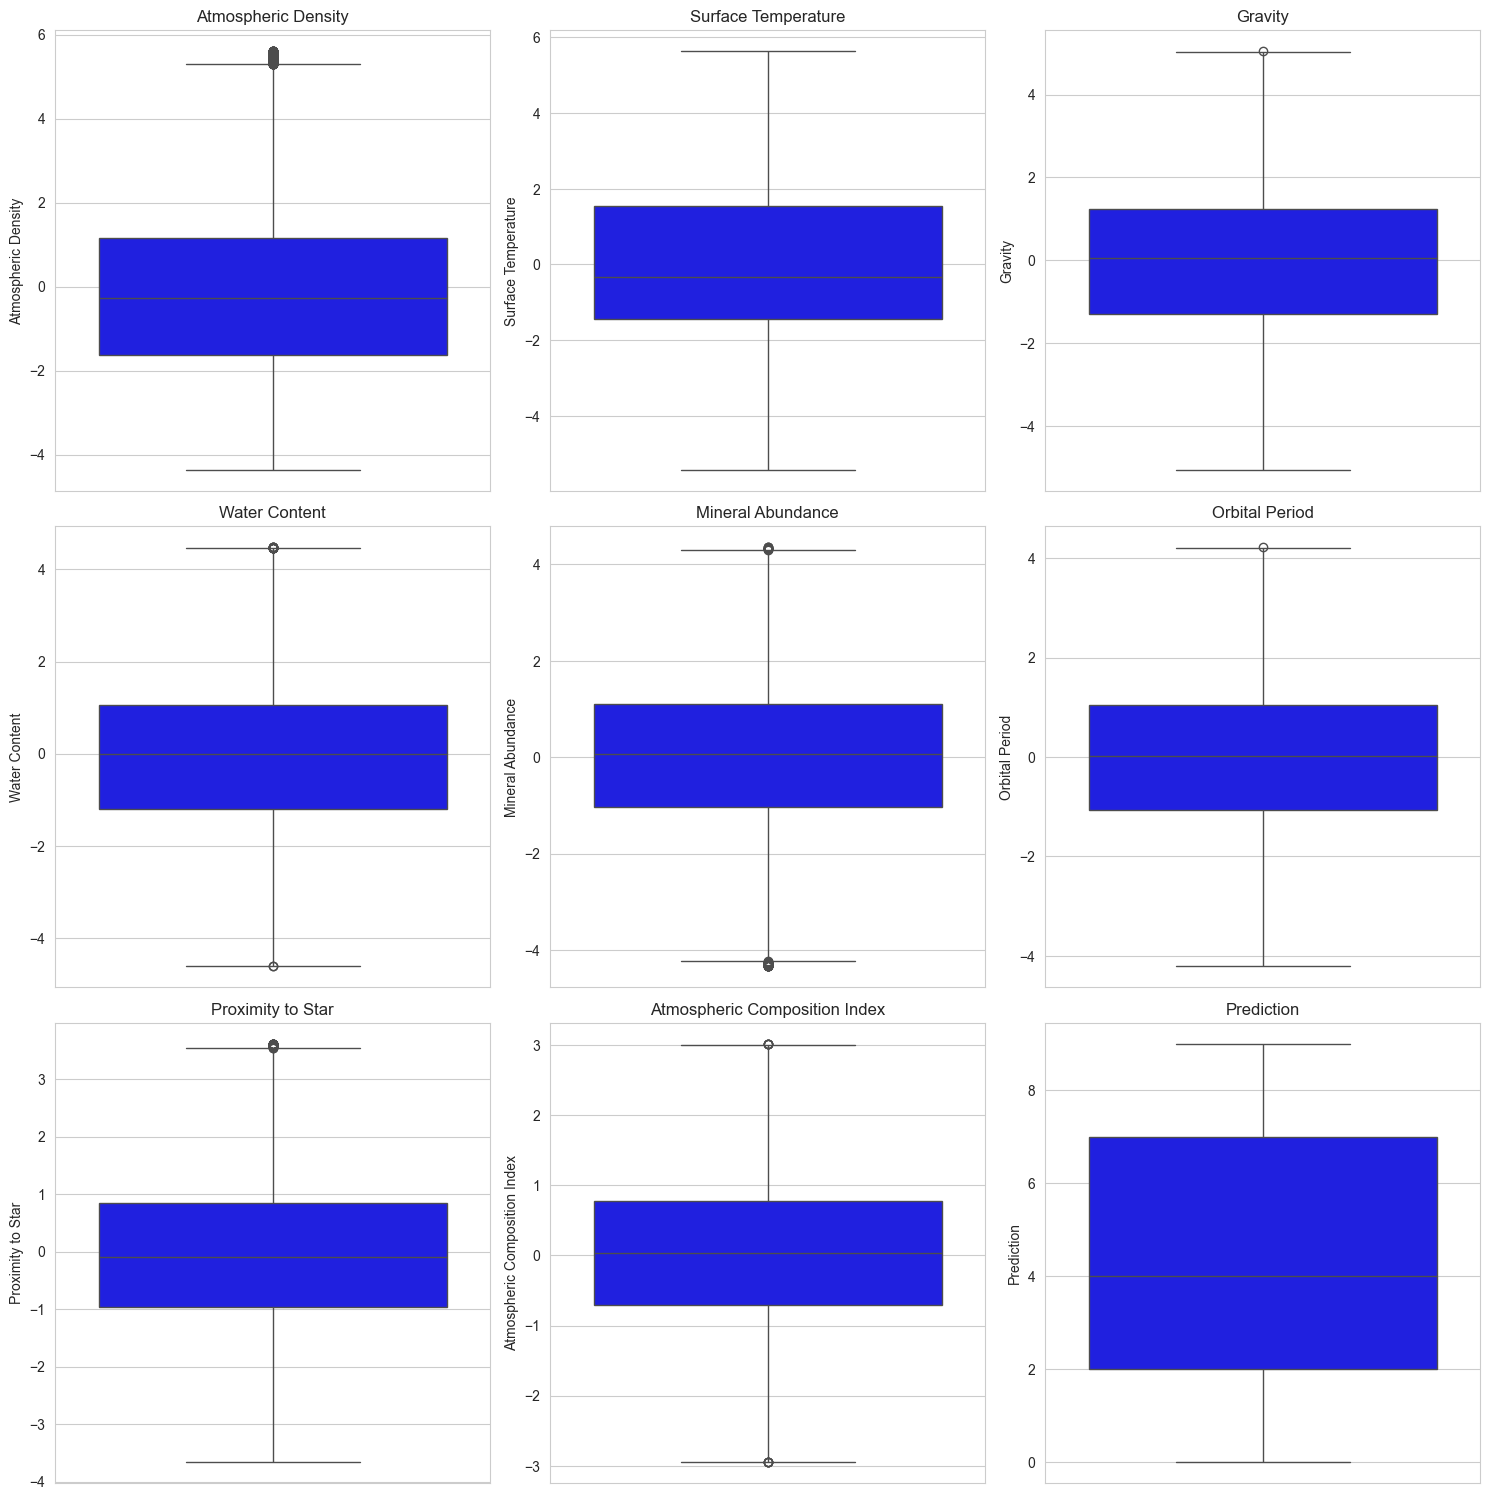

In [12]:
#updated box_plot charts
plt.figure(figsize=(15, 10))

sns.set_style("whitegrid")
df_numeric = df_cleaned.select_dtypes(include=["float64"])

fig, axes = plt.subplots(nrows=len(df_numeric.columns)//3 + 1, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df_numeric.columns):
    sns.boxplot(y=df_numeric[col], ax=axes[i], color="blue")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


FILLING THE NAN VALUES

In [13]:
def extract_category(value):
    if isinstance(value, str):
        match = re.search(r'Category_(\d+)', value)
        if match:
            return int(match.group(1))
    return value

df_cleaned["Radiation Levels"] = df_cleaned["Radiation Levels"].apply(extract_category)
df_cleaned["Magnetic Field Strength"] = df_cleaned["Magnetic Field Strength"].apply(extract_category)

In [14]:
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Fills NaN values using the mean for 'float64' columns and mode for 'object' columns.
    
    Parameters:
    df (pd.DataFrame): Input DataFrame
    
    Returns:
    pd.DataFrame: DataFrame with NaN values filled.
    """
    df_filled = df.copy()
    
    for col in df_filled.select_dtypes(include=['float64']).columns:
        df_filled[col].fillna(df_filled[col].mean(), inplace=True)

    # for col in df_filled.select_dtypes(include=['object']).columns:
    #     df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)
    
    return df_filled
df_filled = fill_missing_values(df_cleaned)

C:\Users\KrishnaMohan_new\AppData\Local\Temp\ipykernel_13436\2441165793.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)


In [15]:
#saving the cleaned train data
df_filled.to_csv("cleaned_dataset.csv")

Training the Models 

In [16]:
X,y = df_filled.drop(['Prediction'],axis=1), df_filled['Prediction']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

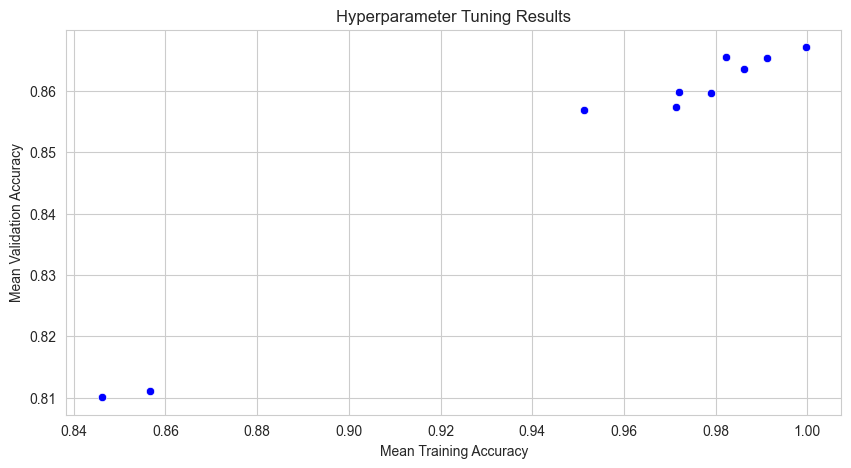

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Test Accuracy: 0.8705
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1351
         1.0       0.95      0.97      0.96      1940
         2.0       0.89      0.91      0.90      1614
         3.0       0.84      0.84      0.84      1714
         4.0       0.86      0.79      0.82      1631
         5.0       0.82      0.85      0.84      1500
         6.0       0.92      0.92      0.92      1639
         7.0       0.91      0.89      0.90      1727
         8.0       0.81      0.83      0.82      1617
         9.0       0.78      0.80      0.79      1674

    accuracy                           0.87     16407
   macro avg       0.87      0.87      0.87     16407
weighted avg       0.87      0.87      0.87     16407



C:\Users\KrishnaMohan_new\AppData\Local\Temp\ipykernel_13436\1892258632.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="Blues_r")


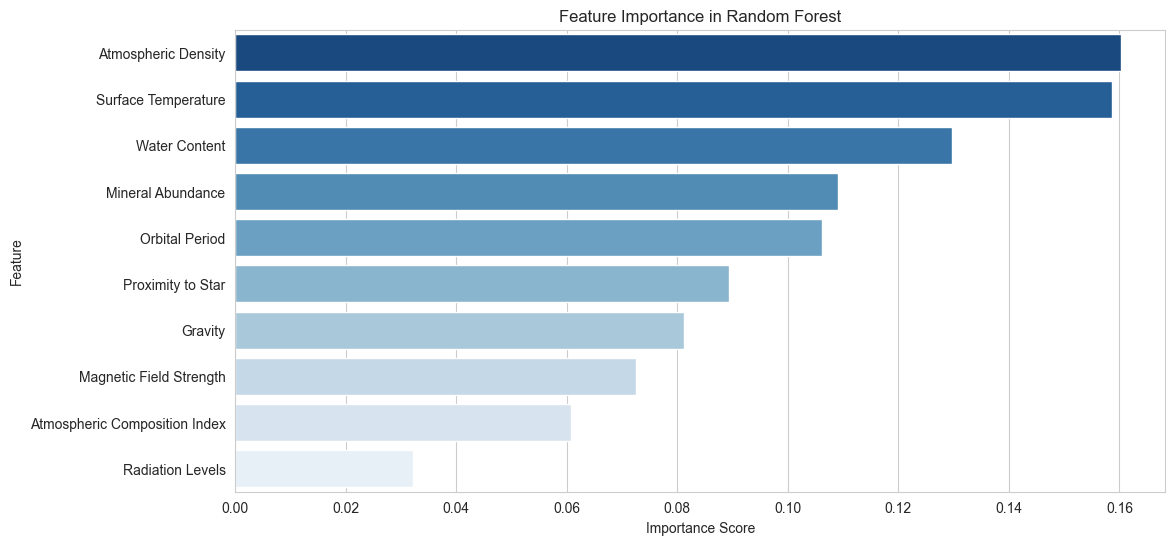

Model saved to model.pkl


In [17]:
def train_random_forest(X_train:pd.DataFrame, X_test:pd.DataFrame, y_train:pd.Series,y_test:pd.Series):
    """
    Trains a Random Forest classifier on the given train dataset and evaluates it on the test dataset.
    Uses cross-validation for better performance estimation.
    
    Parameters:
    train_df (pd.DataFrame): Training dataset
    test_df (pd.DataFrame): Testing dataset
    target_column (str): Name of the target column
    
    Returns:
    None
    """
   
    param_dist = {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 15, 20, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    }

    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    rf_cv = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=10, 
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42,
        return_train_score=True  
    )

    rf_cv.fit(X_train, y_train)

    results_df = pd.DataFrame(rf_cv.cv_results_)

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=results_df["mean_train_score"], y=results_df["mean_test_score"], marker="o", color="blue")
    plt.xlabel("Mean Training Accuracy")
    plt.ylabel("Mean Validation Accuracy")
    plt.title("Hyperparameter Tuning Results")
    plt.show()

    print(f"Best Parameters: {rf_cv.best_params_}")

    best_rf = RandomForestClassifier(**rf_cv.best_params_, random_state=42, n_jobs=-1)
    best_rf.fit(X_train, y_train)
    
    y_pred = best_rf.predict(X_test)

    print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    feature_importance = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": best_rf.feature_importances_
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="Blues_r")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Random Forest")
    plt.show()
    
    joblib.dump(best_rf, 'model.pkl')
    print(f"Model saved to {'model.pkl'}")
    return best_rf


rf_trained = train_random_forest(X_train, X_test, y_train,y_test)

Prediction Pipeline

In [18]:
def prediction(test_file_path:str,model_path:str = None):
  #loading the model
  if model_path:  
    rf_model = joblib.load(model_path)
  else:
    rf_model = rf_trained
  #lading the dataset
  df_test = pd.read_csv(test_file_path)
  
  df_cleaned_predict = df_test.copy()
  #filling the nan values
  df_cleaned_predict['Radiation Levels'] = df_cleaned_predict['Radiation Levels'].apply(extract_category)
  df_cleaned_predict["Magnetic Field Strength"] = df_cleaned_predict["Magnetic Field Strength"].apply(extract_category)
  df_filled_predict = fill_missing_values(df_cleaned_predict)
  
  print(f"shape of the data {df_filled_predict.shape}")
  
  y_predict = rf_model.predict(df_filled_predict)
  df_predict = pd.DataFrame()
  df_predict['Prediction'] = y_predict
  df_predict.to_csv("prediction.csv",index=False)
  return df_predict

In [19]:
test_file_path = "thermoracleTest.csv"
df_predicted = prediction(test_file_path)
df_predicted.head()

shape of the data (10000, 10)


C:\Users\KrishnaMohan_new\AppData\Local\Temp\ipykernel_13436\2441165793.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)


,Prediction
0,7.0
1,2.0
2,1.0
3,0.0
4,4.0
